Customer Segmentation

Data injestion,basic info

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df=pd.read_csv('customer_segmentation_data.csv')
df.head()

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08


In [93]:
df.drop('id',axis=1,inplace=True)

In [94]:
df.shape

(1000, 8)

In [95]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1000 non-null   int64  
 1   gender                1000 non-null   object 
 2   income                1000 non-null   int64  
 3   spending_score        1000 non-null   int64  
 4   membership_years      1000 non-null   int64  
 5   purchase_frequency    1000 non-null   int64  
 6   preferred_category    1000 non-null   object 
 7   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 62.6+ KB


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1000 non-null   int64  
 1   gender                1000 non-null   object 
 2   income                1000 non-null   int64  
 3   spending_score        1000 non-null   int64  
 4   membership_years      1000 non-null   int64  
 5   purchase_frequency    1000 non-null   int64  
 6   preferred_category    1000 non-null   object 
 7   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 62.6+ KB


In [97]:
df.isnull().sum()

age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

EDA

<Axes: ylabel='spending_score'>

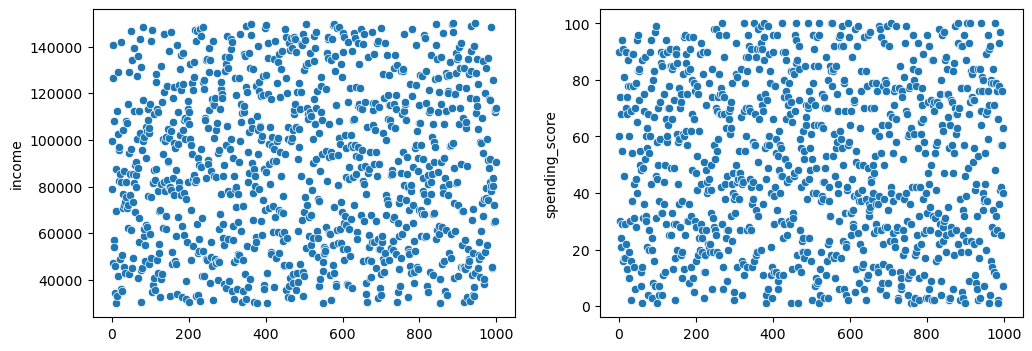

In [98]:

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.scatterplot(df['income'])
plt.subplot(1,2,2)
sns.scatterplot(df['spending_score'])

<Axes: ylabel='spending_score'>

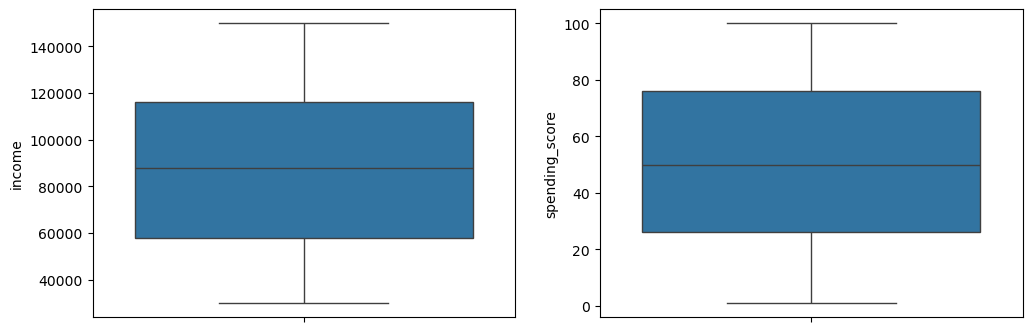

In [99]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(df['income'])
plt.subplot(1,2,2)
sns.boxplot(df['spending_score'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_4192\3881901636.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['income'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_4192\3881901636.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['spending_score'])


<Axes: xlabel='spending_score', ylabel='Density'>

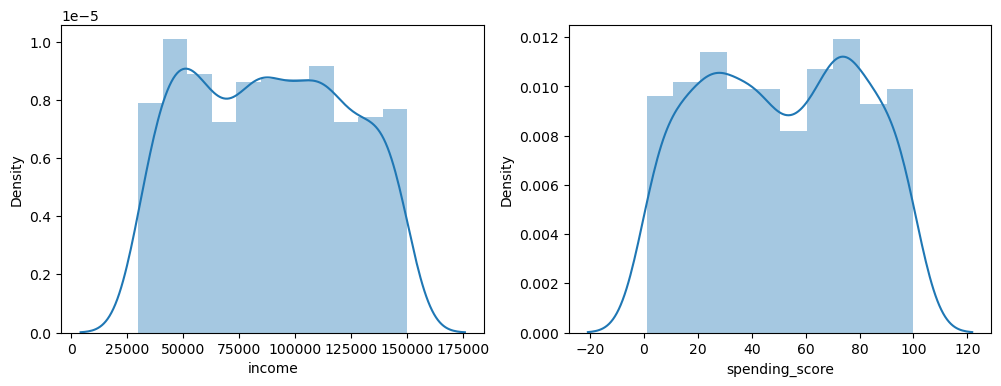

In [100]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(df['income'])
plt.subplot(1,2,2)
sns.distplot(df['spending_score'])


In [101]:
df['gender'].value_counts()

gender
Male      357
Other     327
Female    316
Name: count, dtype: int64

In [102]:
df['preferred_category'].value_counts()

preferred_category
Electronics      215
Sports           210
Home & Garden    206
Groceries        199
Clothing         170
Name: count, dtype: int64

Data Preprocessing


In [103]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df['preferred_category']=le.fit_transform(df['preferred_category'])
df

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,38,0,99342,90,3,24,2,113.53
1,21,0,78852,60,2,42,4,41.93
2,60,0,126573,30,2,28,0,424.36
3,40,2,47099,74,9,5,3,991.93
4,65,0,140621,21,3,25,1,347.08
...,...,...,...,...,...,...,...,...
995,57,1,112170,57,6,1,0,313.64
996,23,2,65337,76,10,23,2,632.83
997,23,1,113097,40,5,42,4,75.09
998,22,0,113695,63,7,44,1,505.16


In [104]:
sc=StandardScaler()
scaled_data=sc.fit_transform(df)

In [105]:
scaled_data

array([[-0.38464377, -1.2609171 ,  0.31686767, ..., -0.18234781,
        -0.0510282 , -1.28154045],
       [-1.51536211, -1.2609171 , -0.28201608, ...,  1.08200524,
         1.38638595, -1.52376266],
       [ 1.07863878, -1.2609171 ,  1.11277804, ...,  0.09861954,
        -1.48844236, -0.23000511],
       ...,
       [-1.38233643, -0.01371918,  0.71890017, ...,  1.08200524,
         1.38638595, -1.41158265],
       [-1.44884927, -1.2609171 ,  0.73637858, ...,  1.22248891,
        -0.76973528,  0.04334062],
       [-0.51766946, -1.2609171 ,  0.05609457, ...,  0.30934505,
        -0.0510282 ,  0.59848958]])

In [106]:
df

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,38,0,99342,90,3,24,2,113.53
1,21,0,78852,60,2,42,4,41.93
2,60,0,126573,30,2,28,0,424.36
3,40,2,47099,74,9,5,3,991.93
4,65,0,140621,21,3,25,1,347.08
...,...,...,...,...,...,...,...,...
995,57,1,112170,57,6,1,0,313.64
996,23,2,65337,76,10,23,2,632.83
997,23,1,113097,40,5,42,4,75.09
998,22,0,113695,63,7,44,1,505.16


Data Preparation

In [107]:
#x=scaled_data.iloc[:,[2,3]]#for dataframe
x=scaled_data[:,[2,3]]
_x=scaled_data
_x

array([[-0.38464377, -1.2609171 ,  0.31686767, ..., -0.18234781,
        -0.0510282 , -1.28154045],
       [-1.51536211, -1.2609171 , -0.28201608, ...,  1.08200524,
         1.38638595, -1.52376266],
       [ 1.07863878, -1.2609171 ,  1.11277804, ...,  0.09861954,
        -1.48844236, -0.23000511],
       ...,
       [-1.38233643, -0.01371918,  0.71890017, ...,  1.08200524,
         1.38638595, -1.41158265],
       [-1.44884927, -1.2609171 ,  0.73637858, ...,  1.22248891,
        -0.76973528,  0.04334062],
       [-0.51766946, -1.2609171 ,  0.05609457, ...,  0.30934505,
        -0.0510282 ,  0.59848958]])

Model

2 feature

In [108]:
from sklearn.cluster import KMeans,DBSCAN

In [109]:
wcss=[]
for i in range(2,11):
    kmean=KMeans(n_clusters=i,init="k-means++")
    kmean.fit(x)
    wcss.append(kmean.inertia_)
    

In [110]:
wcss

[1253.3098833028569,
 790.3379755028288,
 488.2319192909042,
 409.7236895066657,
 343.74503164866474,
 296.41399908505895,
 269.0424827083393,
 224.55169564335534,
 207.8946265658802]

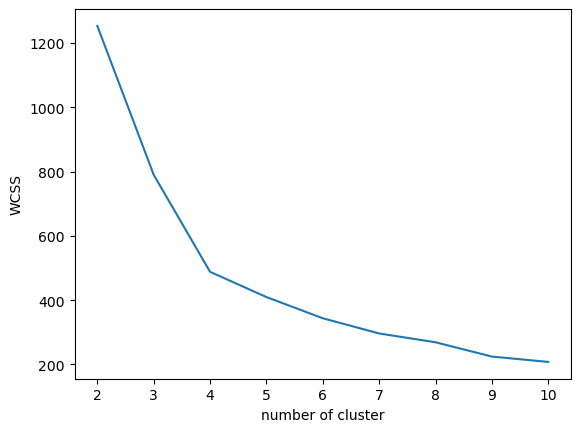

In [111]:
plt.plot(range(2,11),wcss)
plt.xticks(range(2,11))
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [112]:
from kneed import KneeLocator
k=KneeLocator(range(2,11),wcss,curve='convex',direction='decreasing')
k.elbow

4

In [113]:
model=KMeans(n_clusters=4,init='k-means++')
model.fit(x)

KMeans(n_clusters=4)

In [114]:
y=model.predict(x)
y

array([3, 1, 0, 1, 0, 2, 1, 3, 2, 1, 2, 1, 1, 2, 0, 0, 0, 2, 3, 3, 2, 1,
       1, 1, 1, 3, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 3, 1, 2, 0, 2, 3, 2, 1,
       2, 0, 0, 1, 1, 3, 1, 3, 3, 1, 1, 1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 3,
       3, 1, 3, 2, 1, 2, 0, 3, 3, 3, 2, 2, 0, 1, 3, 3, 3, 1, 0, 2, 2, 2,
       0, 1, 0, 3, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1,
       0, 1, 2, 2, 0, 3, 0, 2, 3, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 3,
       3, 1, 3, 0, 1, 3, 0, 1, 1, 2, 3, 1, 0, 0, 0, 3, 1, 0, 3, 2, 1, 2,
       3, 3, 1, 2, 3, 2, 0, 3, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 3, 1, 1, 1,
       0, 3, 3, 0, 1, 0, 1, 2, 3, 3, 0, 2, 3, 1, 3, 0, 2, 1, 1, 0, 1, 3,
       2, 0, 0, 2, 0, 0, 3, 0, 1, 1, 0, 0, 1, 2, 0, 2, 3, 0, 2, 0, 1, 3,
       1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 3,
       0, 3, 0, 2, 2, 1, 3, 0, 0, 3, 0, 3, 3, 1, 0, 1, 1, 1, 3, 2, 3, 1,
       3, 1, 0, 0, 3, 1, 2, 0, 1, 3, 3, 2, 0, 2, 3, 1, 2, 2, 0, 2, 0, 3,
       3, 3, 1, 1, 2, 1, 1, 0, 3, 0, 0, 0, 2, 0, 0,

In [115]:
data=pd.DataFrame(x,y)
data.index.value_counts()

1    284
0    278
2    222
3    216
Name: count, dtype: int64

In [116]:
data

,0,1
3,0.316868,1.358468
1,-0.282016,0.321865
0,1.112778,-0.714738
1,-1.210096,0.805613
0,1.523374,-1.025718
...,...,...
3,0.691806,0.218205
1,-0.677034,0.874720
0,0.718900,-0.369203
3,0.736379,0.425525


In [117]:
df['cluster'] = model.labels_
cluster_counts = df['cluster'].value_counts().sort_index()
cluster_percent = (cluster_counts / len(df)) * 100
centroids=model.cluster_centers_
total = len(df)
cluster_counts = df['cluster'].value_counts().sort_index()
cluster_counts
cluster_percent = (cluster_counts / total) * 100
print(cluster_percent.round(2))




cluster
0    27.8
1    28.4
2    22.2
3    21.6
Name: count, dtype: float64


In [121]:
df

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,cluster
0,38,0,99342,90,3,24,2,113.53,3
1,21,0,78852,60,2,42,4,41.93,1
2,60,0,126573,30,2,28,0,424.36,0
3,40,2,47099,74,9,5,3,991.93,1
4,65,0,140621,21,3,25,1,347.08,0
...,...,...,...,...,...,...,...,...,...
995,57,1,112170,57,6,1,0,313.64,3
996,23,2,65337,76,10,23,2,632.83,1
997,23,1,113097,40,5,42,4,75.09,0
998,22,0,113695,63,7,44,1,505.16,3


In [118]:
#plt.figure(figsize=(8, 6))
#plt.scatter(x[:, 0],x[:, 1], c=model.labels_, cmap='rainbow', s=10)


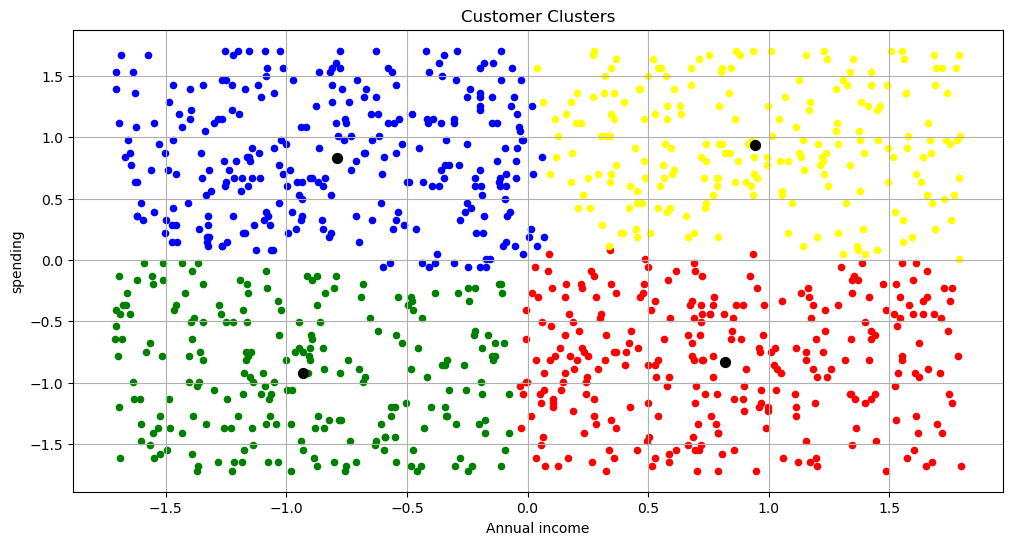

In [119]:
plt.figure(figsize=(12,6))
plt.scatter(x[y==0,0],x[y==0,1],s=20,c='red',label='Cluster 1' )
plt.scatter(x[y==1,0],x[y==1,1],s=20,c='blue',label='Cluster 2' )
plt.scatter(x[y==2,0],x[y==2,1],s=20,c='green',label='Cluster 3' )
plt.scatter(x[y==3,0],x[y==3,1],s=20,c='yellow',label='Cluster 4' )

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=50,c='black',label='Centroids')

plt.title("Customer Clusters")
plt.xlabel('Annual income')
plt.ylabel('spending')
plt.grid(True)
plt.show()

In [120]:
df.drop('cluster',axis=True)

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,38,0,99342,90,3,24,2,113.53
1,21,0,78852,60,2,42,4,41.93
2,60,0,126573,30,2,28,0,424.36
3,40,2,47099,74,9,5,3,991.93
4,65,0,140621,21,3,25,1,347.08
...,...,...,...,...,...,...,...,...
995,57,1,112170,57,6,1,0,313.64
996,23,2,65337,76,10,23,2,632.83
997,23,1,113097,40,5,42,4,75.09
998,22,0,113695,63,7,44,1,505.16


All feature

In [122]:
wcss=[]
for i in range(2,11):
    kmean=KMeans(n_clusters=i,init="k-means++")
    kmean.fit(_x)
    wcss.append(kmean.inertia_)
    

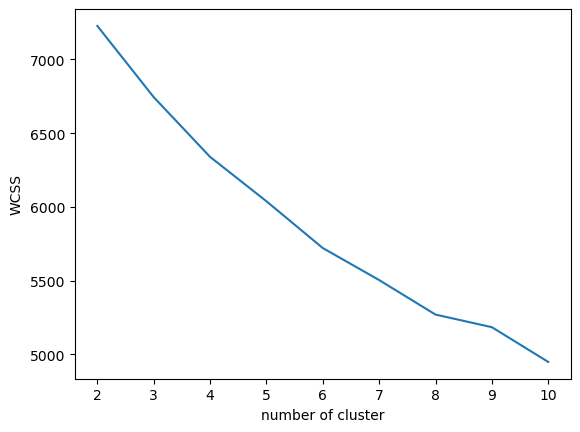

In [123]:
plt.plot(range(2,11),wcss)
plt.xticks(range(2,11))
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [124]:
from kneed import KneeLocator
k=KneeLocator(range(2,11),wcss,curve='convex',direction='decreasing')
k.elbow

6

In [125]:
model=KMeans(n_clusters=5,init='k-means++')
model.fit(_x)
_y=model.predict(_x)
_y

array([1, 4, 1, 0, 1, 3, 2, 2, 0, 1, 2, 0, 1, 0, 3, 2, 1, 0, 4, 1, 1, 4,
       0, 2, 0, 2, 0, 4, 1, 3, 2, 1, 4, 2, 0, 1, 1, 2, 4, 3, 3, 1, 4, 0,
       0, 2, 1, 2, 3, 1, 4, 4, 2, 4, 4, 0, 2, 4, 1, 1, 1, 2, 4, 1, 3, 3,
       1, 4, 1, 0, 1, 0, 1, 1, 2, 4, 0, 2, 3, 0, 2, 1, 4, 2, 1, 3, 0, 4,
       2, 0, 3, 0, 2, 2, 0, 2, 2, 2, 3, 4, 1, 4, 2, 1, 0, 4, 0, 0, 4, 4,
       3, 2, 2, 0, 1, 4, 2, 0, 4, 4, 1, 1, 4, 0, 0, 4, 0, 2, 0, 2, 0, 4,
       2, 4, 4, 3, 4, 1, 4, 1, 2, 4, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 0,
       3, 4, 1, 0, 0, 3, 1, 3, 4, 3, 3, 4, 2, 2, 4, 0, 3, 3, 4, 0, 1, 0,
       3, 1, 4, 3, 1, 3, 4, 4, 4, 2, 3, 3, 3, 0, 1, 2, 4, 2, 2, 3, 4, 4,
       4, 2, 4, 0, 0, 3, 2, 3, 4, 1, 4, 2, 1, 3, 4, 3, 2, 3, 4, 1, 2, 2,
       2, 0, 3, 1, 1, 4, 2, 0, 0, 1, 4, 1, 4, 4, 1, 0, 0, 3, 4, 4, 1, 1,
       3, 4, 3, 2, 0, 0, 4, 1, 2, 3, 3, 2, 2, 2, 3, 2, 1, 4, 3, 0, 2, 1,
       2, 2, 4, 3, 4, 4, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 4, 1, 1, 1,
       1, 3, 0, 1, 4, 0, 0, 2, 2, 3, 1, 3, 0, 3, 1,

Insights

In [126]:
df

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount,cluster
0,38,0,99342,90,3,24,2,113.53,3
1,21,0,78852,60,2,42,4,41.93,1
2,60,0,126573,30,2,28,0,424.36,0
3,40,2,47099,74,9,5,3,991.93,1
4,65,0,140621,21,3,25,1,347.08,0
...,...,...,...,...,...,...,...,...,...
995,57,1,112170,57,6,1,0,313.64,3
996,23,2,65337,76,10,23,2,632.83,1
997,23,1,113097,40,5,42,4,75.09,0
998,22,0,113695,63,7,44,1,505.16,3


In [127]:
df['cluster']=model.labels_
df.groupby('cluster').mean()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
cluster,,,,,,,,
0,48.625000,1.473958,56680.484375,49.442708,5.010417,25.296875,2.848958,680.963594
1,45.928910,0.398104,92732.450237,57.535545,3.540284,15.132701,1.654028,344.050616
2,47.484848,1.601010,92059.388889,58.020202,7.444444,26.843434,0.712121,525.222727
3,37.971751,1.480226,118003.163842,35.141243,4.073446,30.468927,2.898305,487.756384
4,38.887387,0.292793,85303.067568,51.099099,7.049550,35.306306,2.346847,444.513514


In [128]:

centroids=model.cluster_centers_
total = len(df)
cluster_counts = df['cluster'].value_counts().sort_index()
cluster_counts




cluster
0    192
1    211
2    198
3    177
4    222
Name: count, dtype: int64

In [129]:
cluster_percent = (cluster_counts / total) * 100
print(cluster_percent.round(2))


cluster
0    19.2
1    21.1
2    19.8
3    17.7
4    22.2
Name: count, dtype: float64


In [130]:
#code snippet
#retrive data from scaled code ,not used here just know
#insight_data=sc.inverse_transform(scaled_data)
#pd.DataFrame(insight_data)

PCA

In [131]:
from sklearn.decomposition import PCA
pca=PCA()
pca_col=pca.fit_transform(scaled_data)

In [132]:
pca_df=pd.DataFrame(pca_col)
pca_x=pca_df[0]
pca_y=pca_df[1]

In [133]:
pca.explained_variance_ratio_


array([0.14207563, 0.13568657, 0.13008591, 0.12582936, 0.12404099,
       0.11825584, 0.1168035 , 0.1072222 ])

In [134]:
sum(sorted(pca.explained_variance_ratio_,reverse=True)[:5]) # pca is not used here


0.6577184633278894

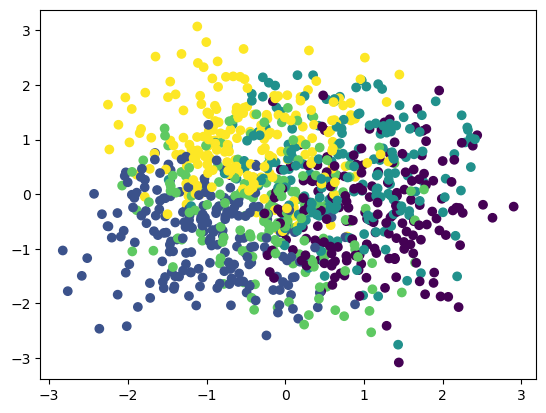

In [135]:
plt.scatter(pca_x,pca_y,c=_y)

Db scan

In [136]:
db=DBSCAN(eps=0.8,min_samples=5)
dby=db.fit_predict(x)
dby

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Text(0.5, 1.0, 'Kmeans with 2 feature')

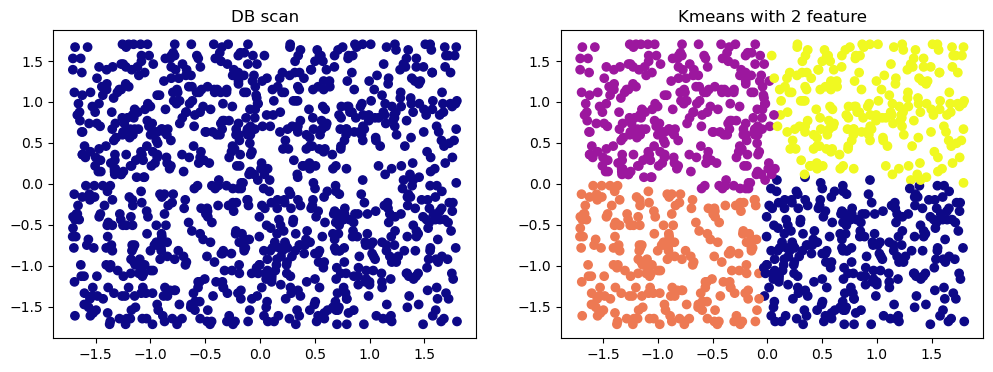

In [137]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(x[:,0],x[:,1],c=dby,cmap='plasma')
plt.title('DB scan')
plt.subplot(1,2,2)
plt.scatter(x[:,0],x[:,1],c=y,cmap='plasma')
plt.title('Kmeans with 2 feature')